### <font color='darkblue'>CSTB</font>

<font color='red'>Problème (non bloquant):</font> le fichier TTL ne correspond pas au résultat donné par Matey.
Les préfixes n'ont pas le bon nom (*ns1*) et ils ne correspondent pas à ceux indiqués dans le fichier de mapping.

# Creation of a module to convert a Json file into a RDF file

### Aim

The aim of this module is to convert files containing data in a natural language into a file which can be read by a machine to create an ontologie.  
The principal idea is to transform a **JSON** file into a **RDF/Turtle** file by using a mapping file (**RML**) previously created.  

### Modules used

To create the mapping file, we used the java librarie named *rml.jar*. You will find it by going to the following link : [Matey link](https://rml.io/yarrrml/matey/#).  
Once the mapping file is created regarding some examples of Json file, we created a Python Module to convert these ones into a **RDF** format / readable by a machine.  
The Python Module is named *Harmonizer*, you will have to put in entry data into a JSON format, the mapping file in a RML format and the format of your choice in output : **ttl** or **jsonld**.

If one of these arguments is missing, there will be an error as follow :

In [1]:
!python harmonizer.py data.json ttl

Error in arguments


## Example of use

In the current folder there is :  
   * 1 JSON file named date.json  
   * 1 RML file named mapping.rml  
   * 1 JAR file named rml.jar which is the Java Library used   
  
We can execute the following command to have the converted file in **Turtle**:  

In [2]:
!python harmonizer.py data.json mapping.rml ttl

Same to convert it into **JsonLD**:

In [3]:
!python harmonizer.py data.json mapping.rml jsonld

--- There are 2 more files named : *output.ttl* and *output.jsonld*

In [4]:
import os
os.listdir()

['.ipynb_checkpoints',
 'data.json',
 'data_output.jsonld',
 'data_output.ttl',
 'harmonizer.py',
 'mapping.rml',
 'Report_Harmonizer.ipynb',
 'rml.jar',
 '__pycache__']

### JSON File 
This is a simple example of data architecture that we will have to deal with.

In [5]:
import json
import pathlib
parsed = json.loads(pathlib.Path("data.json").read_text())
print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "building": [
        {
            "name": "BatA",
            "storeys": [
                {
                    "name": "RdC",
                    "spaces": [
                        {
                            "name": "space001"
                        },
                        {
                            "name": "space002"
                        },
                        {
                            "name": "space003"
                        },
                        {
                            "name": "space004"
                        }
                    ]
                },
                {
                    "name": "R+1",
                    "spaces": [
                        {
                            "name": "space101"
                        },
                        {
                            "name": "space102"
                        },
                        {
                            "name": "space103"
                        },
       

### JSONLD File
Once the transformation into JSON LD file is made, we obtain the following result : 

In [6]:
parsed_json = json.loads(pathlib.Path("data_output.jsonld").read_text())
print(json.dumps(parsed_json, indent=4, sort_keys=True))

[
    {
        "@id": "http://bigg-project.eu/Sensor",
        "@type": [
            "http://bigg-project.eu/BuildingSystem"
        ]
    },
    {
        "@id": "http://bigg-project.eu/instances/BatA",
        "@type": [
            "http://bigg-project.eu/Building"
        ],
        "http://bigg-project.eu/guid": [
            {
                "@value": "4c5ec575c534efc17014c19dc6c2a53f"
            }
        ],
        "http://bigg-project.eu/hasSpace": [
            {
                "@id": "http://bigg-project.eu/instances/space_BatA"
            }
        ],
        "http://bigg-project.eu/name": [
            {
                "@value": "BatA"
            }
        ]
    },
    {
        "@id": "http://bigg-project.eu/instances/BatB",
        "@type": [
            "http://bigg-project.eu/Building"
        ],
        "http://bigg-project.eu/guid": [
            {
                "@value": "37e5fc91cc8c10cda8397f490b803c45"
            }
        ],
        "http://bigg-proje

### Turtle File
Once the transformation into Turtle file is made, we obtain the following result :

In [7]:
ttl = pathlib.Path("data_output.ttl").read_text()
print(ttl)

@prefix ns1: <http://bigg-project.eu/> .

<http://bigg-project.eu/instances/BatA> a ns1:Building ;
    ns1:guid "4c5ec575c534efc17014c19dc6c2a53f" ;
    ns1:hasSpace <http://bigg-project.eu/instances/space_BatA> ;
    ns1:name "BatA" .

<http://bigg-project.eu/instances/BatB> a ns1:Building ;
    ns1:guid "37e5fc91cc8c10cda8397f490b803c45" ;
    ns1:hasSpace <http://bigg-project.eu/instances/space_BatB> ;
    ns1:name "BatB" .

<http://bigg-project.eu/instances/HdSensor104-02> a ns1:Sensor ;
    ns1:name "HdSensor104-02" .

<http://bigg-project.eu/instances/HdSensor202-02> a ns1:Sensor ;
    ns1:name "HdSensor202-02" .

<http://bigg-project.eu/instances/ThSensor104-01> a ns1:Sensor ;
    ns1:name "ThSensor104-01" .

<http://bigg-project.eu/instances/ThSensor202-01> a ns1:Sensor ;
    ns1:name "ThSensor202-01" .

<http://bigg-project.eu/instances/space001> a ns1:BuildingSpace ;
    ns1:name "space001" .

<http://bigg-project.eu/instances/space002> a ns1:BuildingSpace ;
    ns1:name "spa

### Visualize RDF graph
Once the Json File is converted, we can visualize the graph as follow :

In [8]:
import io
import rdflib 
from rdflib import Graph
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

import pathlib
import json

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png)) 


(dot.exe:22284): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:22284): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:22284): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



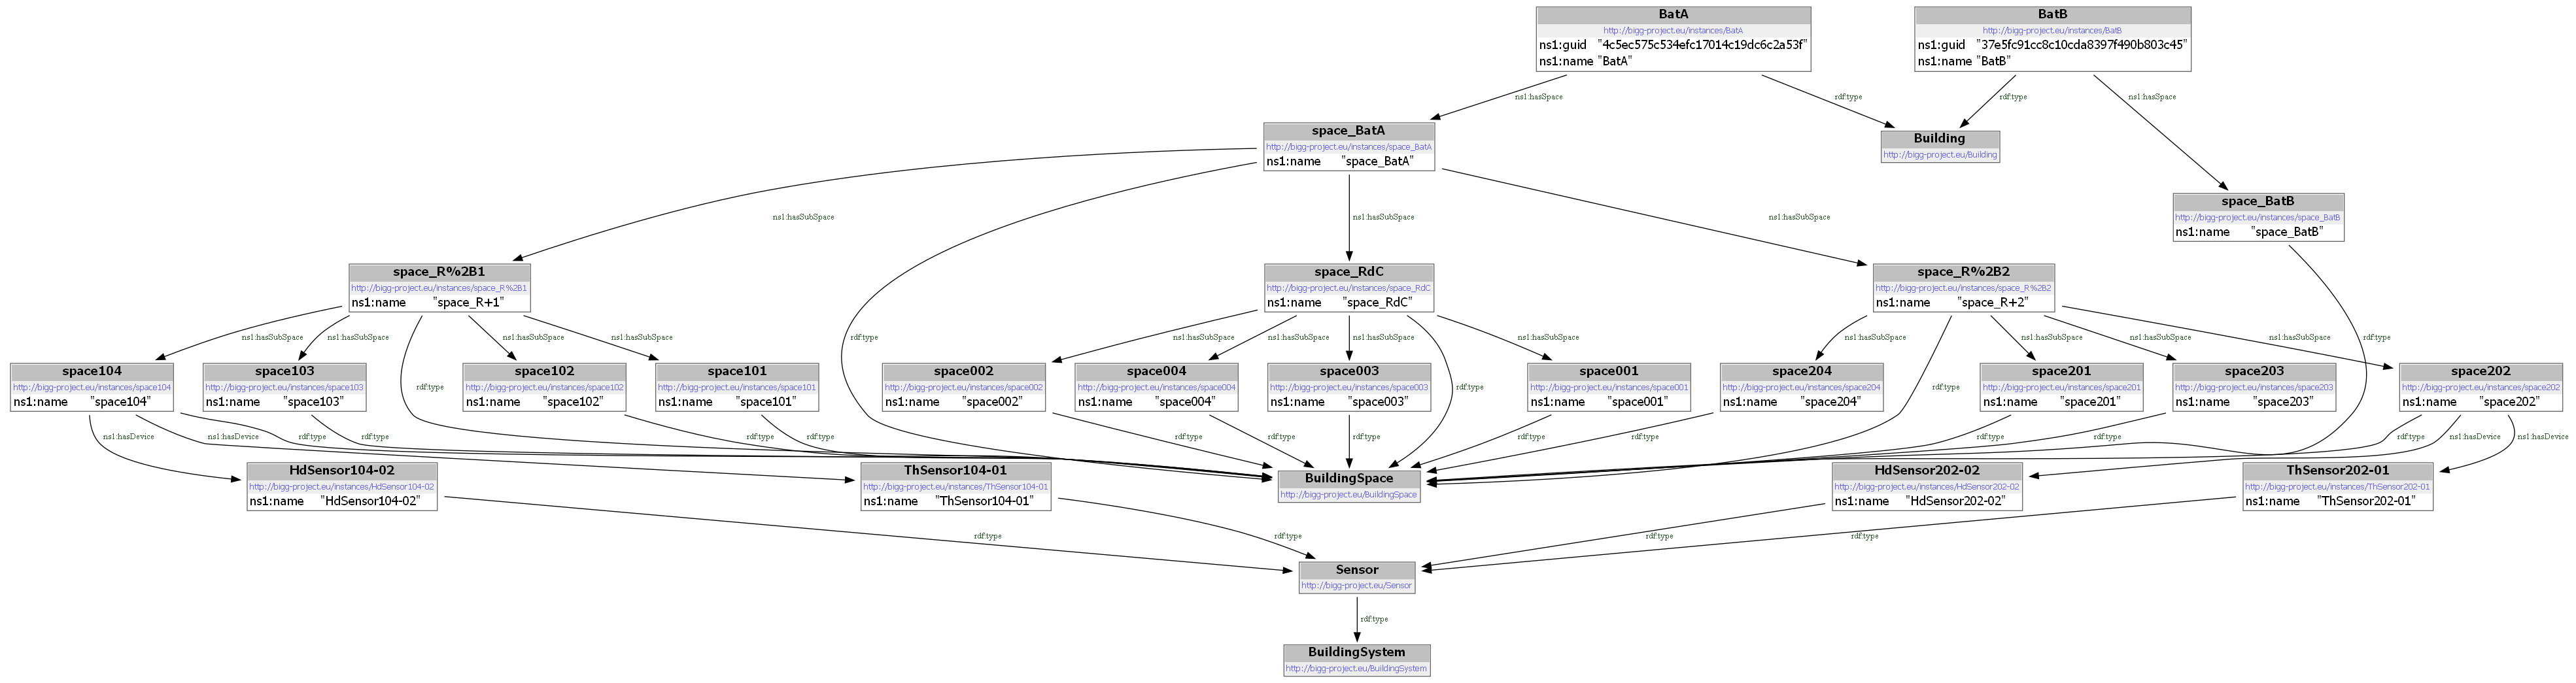

In [9]:
g = Graph()
g.parse(data=ttl, format="turtle")
visualize(g)